In [2]:
import numpy as np
from matplotlib import pyplot as plt
try:
    import tangelo
except ModuleNotFoundError:
    !pip install git+https://github.com/goodchemistryco/Tangelo.git@develop  --quiet
    !pip install pyscf
    !pip install qulacs qiskit qiskit-aer  

  Using cached pyscf-2.7.0-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
Using cached pyscf-2.7.0-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (48.7 MB)
  Using cached qulacs-0.6.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached qiskit-1.2.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached qiskit_aer-0.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.0 kB)
  Using cached rustworkx-0.15.1-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.9 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached stevedore-5.3.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached symengine-0.11.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (1.2 kB)
  Using cached pbr-6.1.0-py2.py3-none-any.whl.metadata (3.4 kB)
Using cached qulacs-0.6.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl

## The Ground State and the First Excited State of LiH Using Variational Quantum Eigensolver (VQE)

In [3]:
from tangelo import SecondQuantizedMolecule

LiH = [('Li', (0, 0, 0)),('H', (0, 0, 1.5949))] #these triples refer to coordinates
# the 1.5949 is experimentally determined to be the space betwn the elements
#see here for example https://cccbdb.nist.gov/expgeom2x.asp?casno=1333740
#use frozen_orbitals = None to set everything active for calculations
mol_LiH = SecondQuantizedMolecule(LiH, q=0, spin=0, basis="sto-3g")

# triples can be made using spin #, abs diff between alpha and beta electrons
#alpha = spin up, beta = spin-down
#spin = alpha - beta electrons, 2 electrons make alpha(it seems) beta is single 
#electron occupying an orbital
mol_LiH_t = SecondQuantizedMolecule(LiH, q=0, spin=2, basis="sto-3g")


In [4]:
#Recieve visualization of the molecule for verification

#there should be 6 spin orbitals, which can hold a max of 2 electrons
#2 are occupied, with one active and one frozen and should have 4
#total electrons

# Note, frozen orbitals mean that some electrons are treated as fixed
# so if one orbital is frozen => only 2 electrons get qbits as opposed to 
#others in the frozen orbital

#mo_occ parameter tells use where our electrons are!
print(mol_LiH) # 2, 2 split between 0 and 1 oribtals
print(mol_LiH_t) # 2,1,1 splits between 0
print(mol_LiH.n_mos, mol_LiH.n_sos)

SecondQuantizedMolecule(xyz=[('Li', (0.0, 0.0, 0.0)), ('H', (0.0, 0.0, 1.5949))], q=0, spin=0, solver=<tangelo.toolboxes.molecular_computation.integral_solver_pyscf.IntegralSolverPySCF object at 0x7db2afa781d0>, n_atoms=2, n_electrons=4, basis='sto-3g', ecp={}, symmetry=False, uhf=False, mf_energy=-7.862026959394135, mo_energies=array([-2.34864417, -0.28570476,  0.07826185,  0.16393842,  0.16393842,
        0.54912925]), mo_occ=array([2., 2., 0., 0., 0., 0.]), n_mos=6, n_sos=12, active_occupied=[1], frozen_occupied=[0], active_virtual=[2, 3, 4, 5], frozen_virtual=[])
SecondQuantizedMolecule(xyz=[('Li', (0.0, 0.0, 0.0)), ('H', (0.0, 0.0, 1.5949))], q=0, spin=2, solver=<tangelo.toolboxes.molecular_computation.integral_solver_pyscf.IntegralSolverPySCF object at 0x7db2871c4810>, n_atoms=2, n_electrons=4, basis='sto-3g', ecp={}, symmetry=False, uhf=False, mf_energy=-7.766133365335711, mo_energies=NPArrayWithTag([-2.34705371, -0.26589778,  0.01337911,  0.16088823,
                 0.16088823

In [5]:
from tangelo.algorithms import FCISolver, CCSDSolver

#Classical energy calculations using FCI and CCSD
#FCI = bad scale good acc, CCSD = good scale worse acc
fci_solver = FCISolver(mol_LiH)
fci_energy = fci_solver.simulate()

print(f"LiH FCI Groud State Energy: {fci_energy}")

ccsd_solver = CCSDSolver(mol_LiH)
ccsd_energy = ccsd_solver.simulate()
print(f"LiH CCSD Groud State Energy: {ccsd_energy}")
print(f"Percent difference of FCI and CCSD: {100*(fci_energy-ccsd_energy)/fci_energy}%\n")

LiH FCI Groud State Energy: -7.882175990801267
LiH CCSD Groud State Energy: -7.882175990941341
Percent difference of FCI and CCSD: -1.777094682432329e-09%



In [6]:
# Do the same for the excited LiH
fci_solver_t = FCISolver(mol_LiH_t)
fci_energy_t = fci_solver_t.simulate()

print(f"LiH FCI First Excited State Energy: {fci_energy_t}")

ccsd_solver_t = CCSDSolver(mol_LiH_t)
ccsd_energy_t = ccsd_solver_t.simulate()
print(f"LiH CCSD First Excited State Energy: {ccsd_energy_t}")
print(f"Percent difference of FCI and CCSD: {100*(fci_energy_t-ccsd_energy_t)/fci_energy_t}%")

## Notice that the value here might be different from literatures.

LiH FCI First Excited State Energy: -7.76613336533571
LiH CCSD First Excited State Energy: -7.766133365335711
Percent difference of FCI and CCSD: -1.1436558940186724e-14%


In [9]:
#Implement a VQE Energy solver
from tangelo.algorithms import VQESolver
from tangelo.algorithms import BuiltInAnsatze as Ansatze

# my_backend_options = {"target": "qulacs", "n_shots": None, "noise_model": None}
#100 cycles for speed's sake
vqe_options = {"molecule": mol_LiH, "verbose": True, "ansatz": Ansatze.QCC, "up_then_down": True}

vqe_solver = VQESolver(vqe_options)
vqe_solver.build()
# print(vqe_solver.ansatz.circuit)
vqe_energy = vqe_solver.simulate()

print(f"\nVQE Ground State Energy: {vqe_energy}")
print(f"Percent difference of FCI and VQE: {100*(fci_energy-vqe_energy)/fci_energy}%")

#print("VQE Ground State Energy using Ansatze.UCCSD: -7.882390470334529\nPercent difference of FCI and VQE: 0.00016416314034363796%")

	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607485 
	Energy = -7.8607472 
	Energy = -7.8607488 
	Energy = -7.8607488 
	Energy = -7.8607482 
	Energy = -7.8607482 
	Energy = -7.8607483 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = -7.8761070 
	Energy = 

In [10]:
# Excited state version
### NOTICE: the VQESolver that takes the first excited state that was defined above cannot use the default Ansatze.UCCSD to generate the ansatz circuit.
###         The circuit initializes the first excited quantum state as "1010000000" and nothing else, but other ansatzes append an actual ansatz circuit.
###         Don't know if this is a problem of our setup or a feature of UCCSD.

vqe_options_t = {"molecule": mol_LiH_t, "verbose": True, "ansatz": Ansatze.QMF, "qubit_mapping": 'scbk', "up_then_down": True} 
## A different ansatz to avoid generating empty ansatz circuit

vqe_solver_t = VQESolver(vqe_options_t)
vqe_solver_t.build()
print(vqe_solver_t.ansatz.circuit)
vqe_energy_t = vqe_solver_t.simulate()

print(f"\nVQE First Excited State Energy: {vqe_energy_t}")
print(f"Percent difference of FCI and VQE: {100*(fci_energy_t-vqe_energy_t)/fci_energy_t}%")

#print("VQE First Excited State Energy: -7.7661333653357065\nPercent difference of FCI and VQE: 1.1436558940186715e-13%")

Circuit object. Size 16 

RX        target : [0]   parameter : 3.141592653589793	 (variational)
RX        target : [1]   parameter : 0.0	 (variational)
RX        target : [2]   parameter : 0.0	 (variational)
RX        target : [3]   parameter : 0.0	 (variational)
RX        target : [4]   parameter : 0.0	 (variational)
RX        target : [5]   parameter : 0.0	 (variational)
RX        target : [6]   parameter : 0.0	 (variational)
RX        target : [7]   parameter : 0.0	 (variational)
RZ        target : [0]   parameter : 0.0	 (variational)
RZ        target : [1]   parameter : 0.0	 (variational)
RZ        target : [2]   parameter : 0.0	 (variational)
RZ        target : [3]   parameter : 0.0	 (variational)
RZ        target : [4]   parameter : 0.0	 (variational)
RZ        target : [5]   parameter : 0.0	 (variational)
RZ        target : [6]   parameter : 0.0	 (variational)
RZ        target : [7]   parameter : 0.0	 (variational)

	Energy = -7.7661334 
	Energy = -7.7661334 
	Energy = -7.766133

In [11]:
from pprint import pprint
pprint(vars(vqe_solver))

{'ansatz': <tangelo.toolboxes.ansatz_generator.qcc.QCC object at 0x7db24ced59d0>,
 'ansatz_options': {},
 'backend': <tangelo.linq.target.target_qulacs.QulacsSimulator object at 0x7db27c2e0090>,
 'backend_options': {'n_shots': None, 'noise_model': None, 'target': None},
 'builtin_ansatze': {<BuiltInAnsatze.QMF: <class 'tangelo.toolboxes.ansatz_generator.qmf.QMF'>>,
                     <BuiltInAnsatze.pUCCD: <class 'tangelo.toolboxes.ansatz_generator.puccd.pUCCD'>>,
                     <BuiltInAnsatze.UpCCGSD: <class 'tangelo.toolboxes.ansatz_generator.upccgsd.UpCCGSD'>>,
                     <BuiltInAnsatze.QCC: <class 'tangelo.toolboxes.ansatz_generator.qcc.QCC'>>,
                     <BuiltInAnsatze.ILC: <class 'tangelo.toolboxes.ansatz_generator.ilc.ILC'>>,
                     <BuiltInAnsatze.UCC3: <tangelo.toolboxes.ansatz_generator.rucc.RUCC object at 0x7db287176e50>>,
                     <BuiltInAnsatze.HEA: <class 'tangelo.toolboxes.ansatz_generator.hea.HEA'>>,
            

## Trotterization & Backend Output (Qubit States) Interpretation

### Interpreting qubit states that was mapped using Jordan-Wigner mapping

In [12]:
from openfermion import get_sparse_operator

# Get the qubit hamiltonian of LiH
LiH_gnd_hamiltonian = vqe_solver.qubit_hamiltonian

# Get the optimal circuit
optimal_circuit = vqe_solver.optimal_circuit

# Function for computing the tensor product
def kron_N(*ops):
    tmp = ops[0]
    for op in ops[1:]:
        tmp = np.kron(tmp,op)
    return tmp

# Apply the calculation of energy based on j-w mapping and the quantum states 
bra0 = np.array([[1,0]])
bra1 = np.array([[0,1]])
# print(np.array2string(kron_N(bra1,bra1,bra0,bra0,bra0,bra0,bra0,bra0,bra0,bra0)[0], threshold=np.inf))
LiH_jw_matrix = get_sparse_operator(LiH_gnd_hamiltonian)

# Function for computing the energy out of the quantum states
def evaluate_energy(quantum_states, print_state_energy=False):
    energy = []
    for prob_key, _ in quantum_states.items():
        braket = []
        for bit in prob_key:
            if bit == "1":
                braket.append(bra1)
            else:
                braket.append(bra0)
        HFbra = kron_N(*braket)
        HFket = HFbra.T
        energy.append(np.real(HFbra.dot(LiH_jw_matrix.dot(HFket)))[0][0])
    if print_state_energy:
        print(f'\nThe energy of each state:\n{dict(zip(quantum_states.keys(), energy))}')
    possibilities = np.array(list(quantum_states.values()))
    return np.sum(energy * possibilities)

### Run circuit simulations with/without noises on the backend


In [13]:
from tangelo.linq import get_backend, ONE_QUBIT_GATES, TWO_QUBIT_GATES
from tangelo.linq.noisy_simulation import NoiseModel

# Create a depolarization noise model to be used in future cells. All gates are treated with a noise level commonly seen in reality.
# In general, a one-qubit gate has lambda between 10^-4 to 10^-3, while a two-qubit gate has lambda between 10^-3 to 10^-2 (noisy hardware can go up to 10^-1).
nm = NoiseModel()
for g1 in ONE_QUBIT_GATES:
    nm.add_quantum_error(g1, 'depol', 0.001)
for g2 in TWO_QUBIT_GATES:
    nm.add_quantum_error(g2, 'depol', 0.01)

In [14]:
# Get backends with noisy or noiseless 
noisy_backend = get_backend(target='qulacs', n_shots=10**3, noise_model=nm)
noiseless_backend = get_backend(target='qulacs')

noisy_probabilities = noisy_backend.simulate(optimal_circuit)[0]
noiseless_probabilities = noiseless_backend.simulate(optimal_circuit)[0]

# Simulate
print(noisy_probabilities,"\n")
print(noiseless_probabilities)

{'1000010000': 0.738, '1001010000': 0.01, '1000011000': 0.008, '0100000000': 0.022, '0000101000': 0.003, '0000110000': 0.009, '0100010000': 0.015, '0100000010': 0.002, '0001000000': 0.006, '0000100000': 0.022, '0000010000': 0.025, '1000000000': 0.033, '1000110000': 0.009, '0100100001': 0.001, '1100010000': 0.007, '0001010000': 0.005, '0010000000': 0.006, '0110000100': 0.001, '0000100001': 0.013, '1010010000': 0.007, '0010010000': 0.007, '0010000100': 0.005, '1000001000': 0.001, '1000101000': 0.001, '0100000001': 0.003, '1000010010': 0.004, '1101000001': 0.001, '0010100100': 0.001, '1000100000': 0.003, '0000000000': 0.001, '1000010001': 0.006, '0001000010': 0.004, '1000010100': 0.003, '0000111000': 0.002, '1100100001': 0.001, '1100100000': 0.001, '0100001000': 0.003, '1100101000': 0.001, '1000100001': 0.001, '0001011010': 0.001, '0100110000': 0.001, '0110000001': 0.001, '1001100010': 0.001, '0000110100': 0.001, '1001000000': 0.001, '1100111000': 0.001, '1001110001': 0.001, '1110000100':

In [15]:
# Evaluate the performance of the noiseless backend
optimal_energy_backend_noiseless = evaluate_energy(noiseless_probabilities, print_state_energy=True)
print(f'\nThe energy calculated from the noiseless backend simulation that uses jordan-wigner mapping: {optimal_energy_backend_noiseless}')
print(f"LiH FCI Ground State Energy: {fci_energy}")
print(f"Relative error: {100*(fci_energy-optimal_energy_backend_noiseless)/fci_energy}%")


The energy of each state:
{'1000010000': -7.8620269593941146, '1100110000': -7.019603833537827, '0100001000': -7.177490804133243, '0000101000': -7.152812557941549, '0010000100': -7.196921401877645, '0110100100': -6.533809660344873, '1110011100': -5.681284404265306, '1010111100': -5.312936946172594, '0001000010': -7.196921401877644, '0101100010': -6.533809660344872, '1101011010': -5.681284404265306, '1001111010': -5.312936946172597, '1011010110': -5.497291587273153, '0111001110': -4.791416639113807, '0011101110': -4.778843176827627, '0100000001': -7.152812557941551, '0000100001': -6.819173312499276, '1000011001': -7.019603833537827, '1100111001': -4.902345824146506, '1110010101': -5.312936946172594, '1010110101': -4.635628488829306, '0010001101': -6.533809660344874, '0110101101': -4.595863035277068, '1101010011': -5.312936946172594, '1001110011': -4.635628488829308, '0001001011': -6.533809660344873, '0101101011': -4.59586303527707, '0111000111': -4.778843176827627, '0011100111': -4.457

***Compared with the relative error of the quantum algorithm executed locally after the classical optimization, the performance drops DRAMATICALLY on backends.***

In [ ]:
# Evaluate the performance of the noisy backend
optimal_energy_backend_noisy = evaluate_energy(noisy_probabilities, print_state_energy=True)
print(f'\nThe energy calculated from the noisy backend simulation that uses j-w mapping: {optimal_energy_backend_noisy}')
print(f"LiH FCI Groud State Energy: {fci_energy}")
print(f"Relative error: {100*(fci_energy-optimal_energy_backend_noisy)/fci_energy}%")

***Given the relative error of this circuit on a noiseless simulator, this result on a noisy backend seems decent.***

### Trotterization (Time Evolution)

In [18]:
from tangelo.toolboxes.unitary_generator.trotter_suzuki import TrotterSuzukiUnitary

NUM_STEPS = 1 
ts_model = TrotterSuzukiUnitary(qubit_hamiltonian = LiH_gnd_hamiltonian)
ts_circuit = ts_model.build_circuit(NUM_STEPS)
# print(ts_circuit)
ts_circuit.draw()

Noiseless qulacs backend was used.

Probability of finding the ground state: 0.9802374735466745
Probability of finding the ground state after 1 second: 0.9809841641925879 



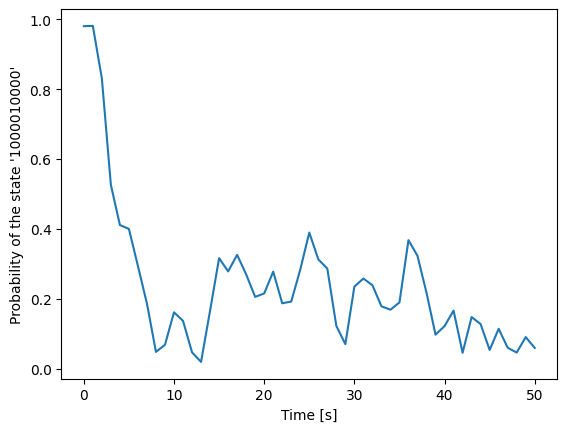

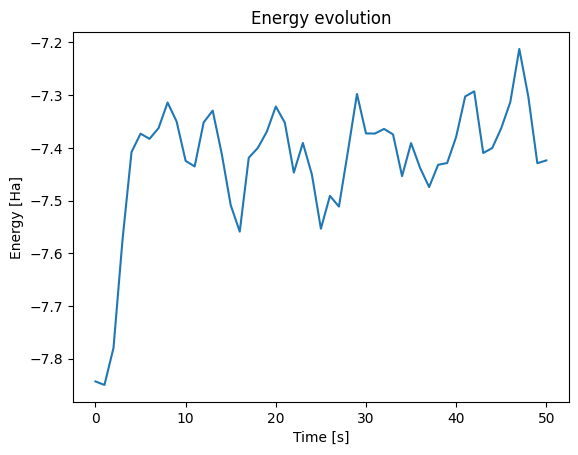

In [19]:
# Let's see what a noiseless simulator (qulacs in this case) outputs.

# The most probable state depends on your qubit_mapping and up_then_down (ansatz choice affects up_then_down), 
# but it should nearly always be the molecule's initial state before any evolution.
most_probable_state = next(iter(noiseless_probabilities))

# When t is small (default time = 1.0 * NUM_STEPS = 1 = 1.0 second) in the time evolution, energy (quantum states) change is minimal as expected:
print("Noiseless qulacs backend was used.")
print(f'\nProbability of finding the ground state: {noiseless_probabilities[most_probable_state]}')
print(f'Probability of finding the ground state after 1 second: {noiseless_backend.simulate(optimal_circuit+ts_circuit)[0][most_probable_state]} \n')

# Can we see how it evolves? Let's try by plotting how the probability of the initial ground state changes:
def plot_state_prob_evolve(state, backend, time_step_for_ts = 1, time_until = 50):   
    t_array = np.arange(0, time_until + time_step_for_ts, time_step_for_ts)
    p_array = []
    ts_m = TrotterSuzukiUnitary(qubit_hamiltonian = LiH_gnd_hamiltonian, time = time_step_for_ts)
    for i in t_array / time_step_for_ts:
        ts = ts_m.build_circuit(i)
        p_array.append(backend.simulate(optimal_circuit + ts)[0][state])
    plt.figure()
    plt.plot(t_array,p_array)
    plt.xlabel("Time [s]")
    plt.ylabel(f"Probability of the state '{state}'")

# Can tune the function argumenets
plot_state_prob_evolve(most_probable_state, noiseless_backend)
    
# See how the energy evolves
energy_array = [evaluate_energy(noiseless_backend.simulate(optimal_circuit+TrotterSuzukiUnitary(qubit_hamiltonian=LiH_gnd_hamiltonian).build_circuit(i))[0]) 
                for i in range(51)]
plt.figure()
plt.title("Energy evolution")
plt.plot(range(51), energy_array)
plt.xlabel("Time [s]")
plt.ylabel("Energy [Ha]")
plt.show()
# print(energy_array[0:10])

In [20]:
# How about on a noisy simulator where the depolarization of every compatible gate is set？

most_probable_state = next(iter(noisy_probabilities))
print("Noisy qulacs backend was used.")
print(f'\nProbability of finding the ground state: {noisy_probabilities[most_probable_state]}')
noisy_evolution = noisy_backend.simulate(optimal_circuit+ts_circuit)[0]
print(f'Qubit states 1 second later:\n{noisy_evolution}')

Noisy qulacs backend was used.

Probability of finding the ground state: 0.738
Qubit states 1 second later:
{'1000100010': 0.002, '0100111000': 0.001, '1011111101': 0.005, '0001001101': 0.002, '0001001111': 0.002, '0100100010': 0.002, '1010110000': 0.003, '0000010000': 0.003, '1001110010': 0.003, '1001001000': 0.001, '1100100001': 0.002, '1010001100': 0.001, '0111010000': 0.003, '0100111101': 0.002, '0011000110': 0.003, '0111011011': 0.003, '0111011111': 0.001, '0111001110': 0.001, '0110011101': 0.002, '0110101010': 0.001, '1101001011': 0.001, '1001010001': 0.002, '0111000111': 0.004, '1000000010': 0.002, '0111111101': 0.001, '0100110111': 0.003, '1100111010': 0.001, '0001000010': 0.002, '1100000011': 0.002, '1000010100': 0.002, '1101100000': 0.001, '1000001011': 0.003, '1000110001': 0.001, '1010000101': 0.001, '0100011011': 0.002, '1110111100': 0.003, '0011111100': 0.003, '0110010100': 0.003, '1001101001': 0.002, '0101001011': 0.002, '0011011011': 0.001, '1011001011': 0.004, '11110101

***Notice that the quantum states can't last long on a noisy backend--molecular states calculated by the input circuit vanish in less than 1 second.***

***But how about the energy information?***

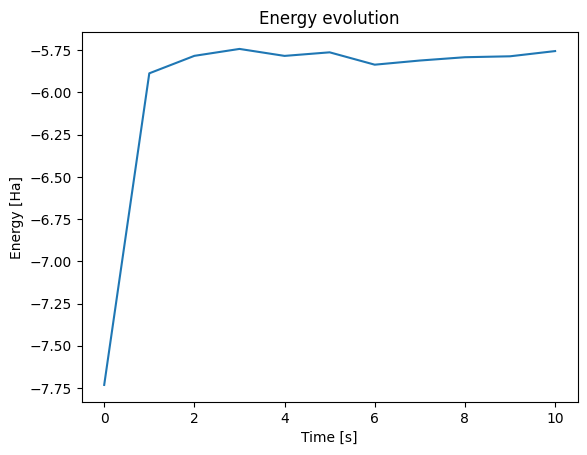

In [21]:
# Let's see how the dominant state at t = 0 evolves.
# plot_state_prob_evolve(most_probable_state, noisy_backend, time_step_for_ts = 0.05, time_until = 1.5)

# See how the energy evolves
energy_array = [evaluate_energy(noisy_backend.simulate(optimal_circuit+ts_model.build_circuit(i))[0]) for i in range(11)]

plt.figure()
plt.plot(range(11), energy_array)
plt.xlabel("Time [s]")
plt.ylabel("Energy [Ha]")
plt.title("Energy evolution")
plt.show()

***The energy drops more and a little faster, but the trend remains the same. Given that there are no longer dominant states as time passes, it's resonable to guess that because of decoherance, a quantum backend calculates the energy as being spread out among in various states, which isn't physically true--ground state should nearly always stays at ground state.***

## Mappings & Ansatze experiments with LiH and VQE

In [38]:
# Try different Mappings without changing the ansatze
from tangelo.algorithms import BuiltInAnsatze as Ansatze
# VQE-UCCSD on LiH with different qubit mappings
map_names = ['Jordan-Wigner', 'Bravyi-Kitaev', 'Symmetry Conserving Bravyi-Kitaev']
maps = ['jw', 'bk', 'scbk']
for name, qm in zip(map_names, maps):
    vqe1_options = {"molecule": mol_LiH, "ansatz": Ansatze.UCCSD, "up_then_down": True, "qubit_mapping": qm}
    vqe1_solver = VQESolver(vqe1_options)
    vqe1_solver.build()
    vqe1_solver.simulate()
    print(f"Qubit mapping currently in use: {name}\n")
    print(f"VQE Ground State Energy: {vqe1_solver.optimal_energy}")
    print(f"Percent difference of FCI and VQE: {100*(fci_energy-vqe1_solver.optimal_energy)/fci_energy}%")
    print(vqe1_solver.get_resources(), "\n")

Qubit mapping currently in use: Jordan-Wigner

VQE Ground State Energy: -7.882174298862626
Percent difference of FCI and VQE: 2.1465375078165133e-05%
{'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 1985, 'circuit_2qubit_gates': 1616, 'circuit_var_gates': 144, 'vqe_variational_parameters': 14} 

Qubit mapping currently in use: Bravyi-Kitaev

VQE Ground State Energy: -7.882172112669746
Percent difference of FCI and VQE: 4.920128052625131e-05%
{'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 1834, 'circuit_2qubit_gates': 1442, 'circuit_var_gates': 144, 'vqe_variational_parameters': 14} 

Qubit mapping currently in use: Symmetry Conserving Bravyi-Kitaev

VQE Ground State Energy: -7.882170877569593
Percent difference of FCI and VQE: 6.48708133336918e-05%
{'qubit_hamiltonian_terms': 276, 'circuit_width': 8, 'circuit_depth': 1660, 'circuit_2qubit_gates': 1276, 'circuit_var_gates': 144, 'vqe_variational_parameters': 14} 



In [34]:
# Try different Ansatz ('jw' as the mapping; HEA isn't compatible with 'jw')
from tangelo.algorithms import BuiltInAnsatze as Ansatze
name = ['UCCSD','ILC', 'QCC', 'QMF']
ansatz = [Ansatze.UCCSD, Ansatze.ILC, Ansatze.QCC, Ansatze.QMF]
print('Jordan-Wigner mapping was used for the following results.\n')

# "up_then_down" must be True for QCC-based Ansatze.
for n, az in zip(name, ansatz):
    vqe2_options = {"molecule": mol_LiH, "ansatz": az, "up_then_down": True, "qubit_mapping": 'jw'}
    vqe2_solver = VQESolver(vqe2_options)
    vqe2_solver.build()
    vqe2_solver.simulate()
    print(f"Ansatze currently in use: {n}\n")
    print(f"VQE Ground State Energy: {vqe2_solver.optimal_energy}")
    print(f"Percent difference of FCI and VQE: {100*(fci_energy-vqe2_solver.optimal_energy)/fci_energy}%")
    print(vqe2_solver.get_resources(), "\n")


Jordan-Wigner mapping was used for the following results.

Ansatze currently in use: UCCSD

VQE Ground State Energy: -7.882174298861719
Percent difference of FCI and VQE: 2.146538658298522e-05%
{'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 1985, 'circuit_2qubit_gates': 1616, 'circuit_var_gates': 144, 'vqe_variational_parameters': 14} 

Ansatze currently in use: ILC

VQE Ground State Energy: -7.881746411660311
Percent difference of FCI and VQE: 0.005450006970885006%
{'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 133, 'circuit_2qubit_gates': 98, 'circuit_var_gates': 31, 'vqe_variational_parameters': 26} 

Ansatze currently in use: QCC

VQE Ground State Energy: -7.881490166425239
Percent difference of FCI and VQE: 0.008700952336361024%
{'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 56, 'circuit_2qubit_gates': 36, 'circuit_var_gates': 26, 'vqe_variational_parameters': 26} 

Ansatze currently in use: QMF

VQE Ground St

In [35]:
# Try different Ansatz ('bk' as map)
name1 = ['UCCSD', 'HEA', 'ILC', 'QCC', 'QMF']
ansatz1 = [Ansatze.UCCSD, Ansatze.HEA, Ansatze.ILC, Ansatze.QCC, Ansatze.QMF]
print('Bravyi-Kitaev mapping was used for the following results.\n')

for n, az in zip(name1, ansatz1):
    vqe3_options = {"molecule": mol_LiH, "ansatz": az, "up_then_down": True, "qubit_mapping": 'bk'}
    vqe3_solver = VQESolver(vqe3_options)
    vqe3_solver.build()
    vqe3_solver.simulate()
    print(f"Ansatze currently in use: {n}\n")
    print(f"VQE Ground State Energy: {vqe3_solver.optimal_energy}")
    print(f"Percent difference of FCI and VQE: {100*(fci_energy-vqe3_solver.optimal_energy)/fci_energy}%")
    print(vqe3_solver.get_resources(), "\n")

# 'bk' mapping seems to be a little better for the default setting of UCCSD, but for ILC and QCC it depends on whether "up_then_down" is False.
# ILC and QCC provide the best balance between accuracy and circuit complexity compared to other ansatzes no matter the mapping used.

Bravyi-Kitaev mapping was used for the following results.

Ansatze currently in use: UCCSD

VQE Ground State Energy: -7.882172112671685
Percent difference of FCI and VQE: 4.9201255927796613e-05%
{'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 1834, 'circuit_2qubit_gates': 1442, 'circuit_var_gates': 144, 'vqe_variational_parameters': 14} 

Ansatze currently in use: HEA

VQE Ground State Energy: -7.862009609968488
Percent difference of FCI and VQE: 0.25584788840434397%
{'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 14, 'circuit_2qubit_gates': 18, 'circuit_var_gates': 90, 'vqe_variational_parameters': 90} 

Ansatze currently in use: ILC

VQE Ground State Energy: -7.881746411660292
Percent difference of FCI and VQE: 0.005450006971121638%
{'qubit_hamiltonian_terms': 276, 'circuit_width': 10, 'circuit_depth': 127, 'circuit_2qubit_gates': 92, 'circuit_var_gates': 31, 'vqe_variational_parameters': 26} 

Ansatze currently in use: QCC

VQE Ground St

In [37]:
# Try different Ansatz ('scbk' as the mapping, which strictly requires "up_then_down" = True)
print('Symmetry Conserving Bravyi-Kitaev mapping was used for the following results.\n')

for n, az in zip(name1, ansatz1):
    vqe3_options = {"molecule": mol_LiH, "ansatz": az, "up_then_down": True, "qubit_mapping": 'scbk'}
    vqe3_solver = VQESolver(vqe3_options)
    vqe3_solver.build()
    vqe3_solver.simulate()
    print(f"Ansatze currently in use: {n}\n")
    print(f"VQE Ground State Energy: {vqe3_solver.optimal_energy}")
    print(f"Percent difference of FCI and VQE: {100*(fci_energy-vqe3_solver.optimal_energy)/fci_energy}%")
    print(vqe3_solver.get_resources(), "\n")

Symmetry Conserving Bravyi-Kitaev mapping was used for the following results.

Ansatze currently in use: UCCSD

VQE Ground State Energy: -7.882170877576256
Percent difference of FCI and VQE: 6.48707288110126e-05%
{'qubit_hamiltonian_terms': 276, 'circuit_width': 8, 'circuit_depth': 1660, 'circuit_2qubit_gates': 1276, 'circuit_var_gates': 144, 'vqe_variational_parameters': 14} 

Ansatze currently in use: HEA

VQE Ground State Energy: -7.705322256599063
Percent difference of FCI and VQE: 2.2437171462372554%
{'qubit_hamiltonian_terms': 276, 'circuit_width': 8, 'circuit_depth': 14, 'circuit_2qubit_gates': 14, 'circuit_var_gates': 72, 'vqe_variational_parameters': 72} 

Ansatze currently in use: ILC

VQE Ground State Energy: -7.881746411660273
Percent difference of FCI and VQE: 0.005450006971369539%
{'qubit_hamiltonian_terms': 276, 'circuit_width': 8, 'circuit_depth': 129, 'circuit_2qubit_gates': 94, 'circuit_var_gates': 27, 'vqe_variational_parameters': 22} 

Ansatze currently in use: QCC


***We can conclude that the specific mapping should be tuned for each circuit, but the choice of Ansatze matters the most. For LiH and default optimizer in VQE, UCCSD is the most accurate (10^-7) one but produces the most complex circuit. ILC and QCC have a good balance (10^-5), though each might favor different mappings depending on the circuit. QMF produces the least complex circuit with a slightly higher relative relative error (10^-3).***